In [1]:
import pandas as pd
all_data = pd.read_csv('groceries - groceries.csv')
print(all_data) #Видно, что датафрейм содержит NaN значения

      Item(s)               Item 1               Item 2            Item 3  \
0           4         citrus fruit  semi-finished bread         margarine   
1           3       tropical fruit               yogurt            coffee   
2           1           whole milk                  NaN               NaN   
3           4            pip fruit               yogurt      cream cheese   
4           4     other vegetables           whole milk    condensed milk   
...       ...                  ...                  ...               ...   
9830       17              sausage              chicken              beef   
9831        1    cooking chocolate                  NaN               NaN   
9832       10              chicken         citrus fruit  other vegetables   
9833        4  semi-finished bread        bottled water              soda   
9834        5              chicken       tropical fruit  other vegetables   

                        Item 4         Item 5          Item 6  \
0         

In [2]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

In [3]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)
print(unique_items)
print('Количество товаров :' + str(len(unique_items)))


{'specialty vegetables', 'shopping bags', 'cooking chocolate', 'sauces', 'bottled water', 'pastry', 'honey', 'finished products', 'citrus fruit', 'liver loaf', 'hard cheese', 'salty snack', 'softener', 'flour', 'chicken', 'cream cheese', 'waffles', 'pickled vegetables', 'oil', 'male cosmetics', 'rice', 'sugar', 'dental care', 'liqueur', 'cream', 'herbs', 'bags', 'baby food', 'frozen meals', 'meat', 'decalcifier', 'seasonal products', 'artif. sweetener', 'bottled beer', 'rolls/buns', 'white bread', 'prosecco', 'spices', 'ham', 'coffee', 'potted plants', 'whipped/sour cream', 'abrasive cleaner', 'flower soil/fertilizer', 'Instant food products', 'brown bread', 'photo/film', 'meat spreads', 'whole milk', 'nut snack', 'ketchup', 'vinegar', 'light bulbs', 'preservation products', 'butter', 'hamburger meat', 'hygiene articles', 'frozen fruits', 'canned vegetables', 'dish cleaner', 'butter milk', 'roll products', 'syrup', 'grapes', 'frankfurter', 'snack products', 'condensed milk', 'soups', '

In [4]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

In [5]:
from mlxtend.frequent_patterns import fpgrowth
result = fpgrowth(data, min_support=0.03, use_colnames = True)
print(result)


     support                             itemsets
0   0.082766                       (citrus fruit)
1   0.058566                          (margarine)
2   0.139502                             (yogurt)
3   0.104931                     (tropical fruit)
4   0.058058                             (coffee)
..       ...                                  ...
58  0.033249                 (whole milk, pastry)
59  0.047382  (other vegetables, root vegetables)
60  0.048907        (root vegetables, whole milk)
61  0.030605                (rolls/buns, sausage)
62  0.032232     (whole milk, whipped/sour cream)

[63 rows x 2 columns]


In [6]:
result["leng"] = result["itemsets"].apply(lambda x: len(x))
leng= set(result["leng"])
for i in leng:
    result_l = result[(result['leng'] == i)]
    print('При длине ' + str(i)+' минимальное значение:'+ str(min(result_l["support"])))
    print('максимальное значение:'+str(max(result_l["support"])))

При длине 1 минимальное значение:0.03040162684290798
максимальное значение:0.25551601423487547
При длине 2 минимальное значение:0.030096593797661414
максимальное значение:0.07483477376715811


In [7]:
from mlxtend.frequent_patterns import fpmax
result_fpmax = fpmax(data, min_support=0.03, use_colnames=True)
print(result_fpmax)

     support                             itemsets
0   0.030402                (specialty chocolate)
1   0.031012                             (onions)
2   0.032944                   (hygiene articles)
3   0.033249                            (berries)
4   0.033249                     (hamburger meat)
5   0.033452                           (UHT-milk)
6   0.033859                              (sugar)
7   0.037112                            (dessert)
8   0.037417           (long life bakery product)
9   0.037824                        (salty snack)
10  0.038434                            (waffles)
11  0.039654                       (cream cheese)
12  0.042095                        (white bread)
13  0.042908                            (chicken)
14  0.048094                  (frozen vegetables)
15  0.049619                          (chocolate)
16  0.052364                            (napkins)
17  0.052466                               (beef)
18  0.053279                               (curd)


In [8]:
result_fpmax["leng"] = result_fpmax["itemsets"].apply(lambda x: len(x))
leng= set(result_fpmax["leng"])
for i in leng:
    result_l = result_fpmax[(result_fpmax['leng'] == i)]
    print('При длине ' + str(i)+' минимальное значение:'+ str(min(result_l["support"])))
    print('максимальное значение:'+str(max(result_l["support"])))

При длине 1 минимальное значение:0.03040162684290798
максимальное значение:0.09852567361464158
При длине 2 минимальное значение:0.030096593797661414
максимальное значение:0.07483477376715811


In [9]:
print('FP-Max это разновидность FP-Growth, который фокусируется на получении максимальных наборов предметов. ')

FP-Max это разновидность FP-Growth, который фокусируется на получении максимальных наборов предметов. 


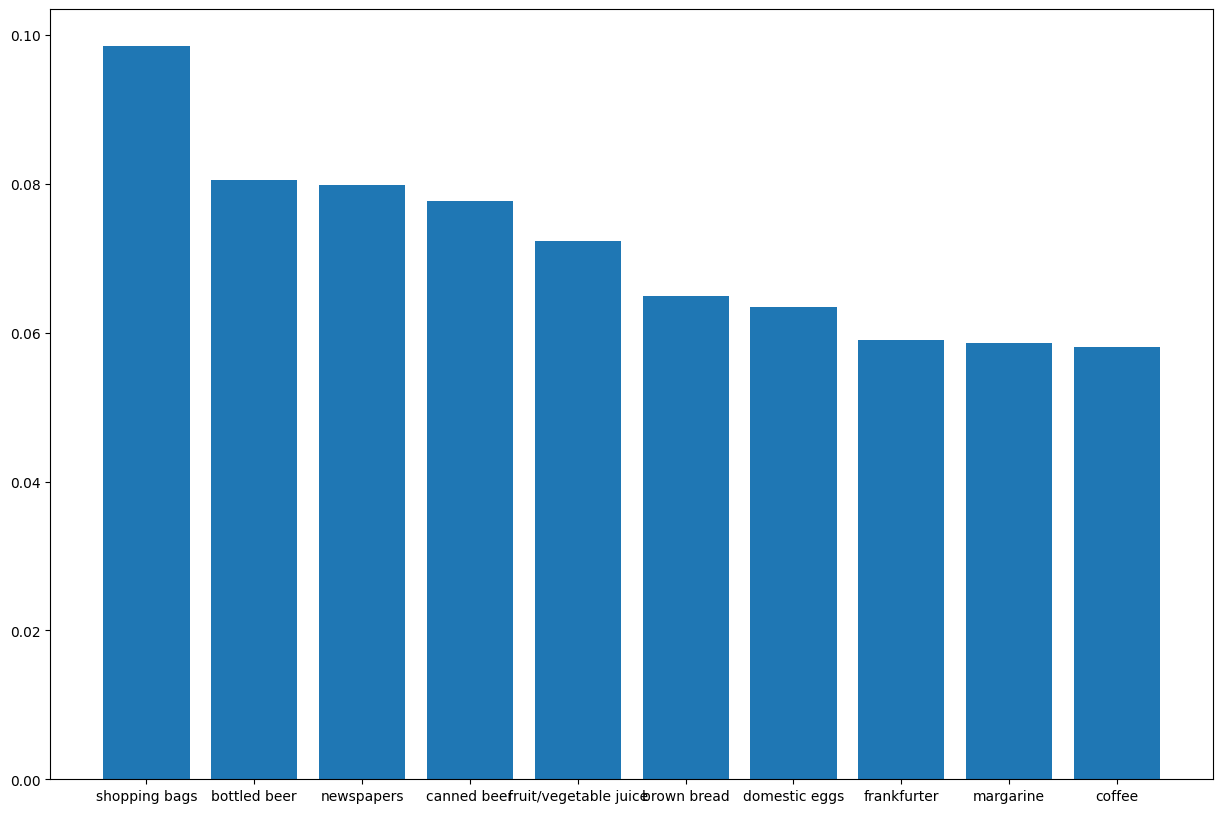

In [10]:
import matplotlib.pyplot as plt
result_fpmax1 = fpmax(data, min_support=0.03, use_colnames=True, max_len=1)
itemsets = []
for i in result_fpmax1["itemsets"]:
    itemsets.append(*list(i))
supports = []
for i in result_fpmax1["support"]:
    supports.append(i)
dict = {}
for i in range(len(itemsets)):
    dict[itemsets[i]] = supports[i]
gist = tuple(sorted(dict.items(), key=lambda x: x[1], reverse=True))[0:10]
fig, ax = plt.subplots(figsize=(15, 10))
names = [name[0] for name in gist]
sups = [sup[1] for sup in gist]
ax.bar(names, sups)
plt.show()



In [11]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags',
         'sausage', 'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables',
         'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer', 'bottled beer']
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem, str) and elem in items] for row in np_data]

In [12]:
te1 = TransactionEncoder()
te_ary1 = te1.fit(np_data).transform(np_data)
data1 = pd.DataFrame(te_ary1, columns=te1.columns_)

In [13]:
result11 = fpgrowth(data1, min_support=0.03, use_colnames=True)
print(result11)

     support                             itemsets
0   0.082766                       (citrus fruit)
1   0.139502                             (yogurt)
2   0.104931                     (tropical fruit)
3   0.255516                         (whole milk)
4   0.193493                   (other vegetables)
5   0.183935                         (rolls/buns)
6   0.080529                       (bottled beer)
7   0.110524                      (bottled water)
8   0.174377                               (soda)
9   0.088968                             (pastry)
10  0.108998                    (root vegetables)
11  0.077682                        (canned beer)
12  0.093950                            (sausage)
13  0.098526                      (shopping bags)
14  0.071683                 (whipped/sour cream)
15  0.057651                               (pork)
16  0.030503           (whole milk, citrus fruit)
17  0.056024                 (yogurt, whole milk)
18  0.034367                 (yogurt, rolls/buns)


In [14]:
result12 = fpmax(data1, min_support=0.03, use_colnames=True)
print(result12)

     support                             itemsets
0   0.057651                               (pork)
1   0.032232     (whole milk, whipped/sour cream)
2   0.077682                        (canned beer)
3   0.080529                       (bottled beer)
4   0.030503           (whole milk, citrus fruit)
5   0.033249                 (whole milk, pastry)
6   0.030605                (rolls/buns, sausage)
7   0.098526                      (shopping bags)
8   0.035892   (other vegetables, tropical fruit)
9   0.042298         (tropical fruit, whole milk)
10  0.047382  (other vegetables, root vegetables)
11  0.048907        (root vegetables, whole milk)
12  0.034367          (bottled water, whole milk)
13  0.034367                 (yogurt, rolls/buns)
14  0.043416           (other vegetables, yogurt)
15  0.056024                 (yogurt, whole milk)
16  0.032740             (other vegetables, soda)
17  0.038332                   (rolls/buns, soda)
18  0.040061                   (soda, whole milk)


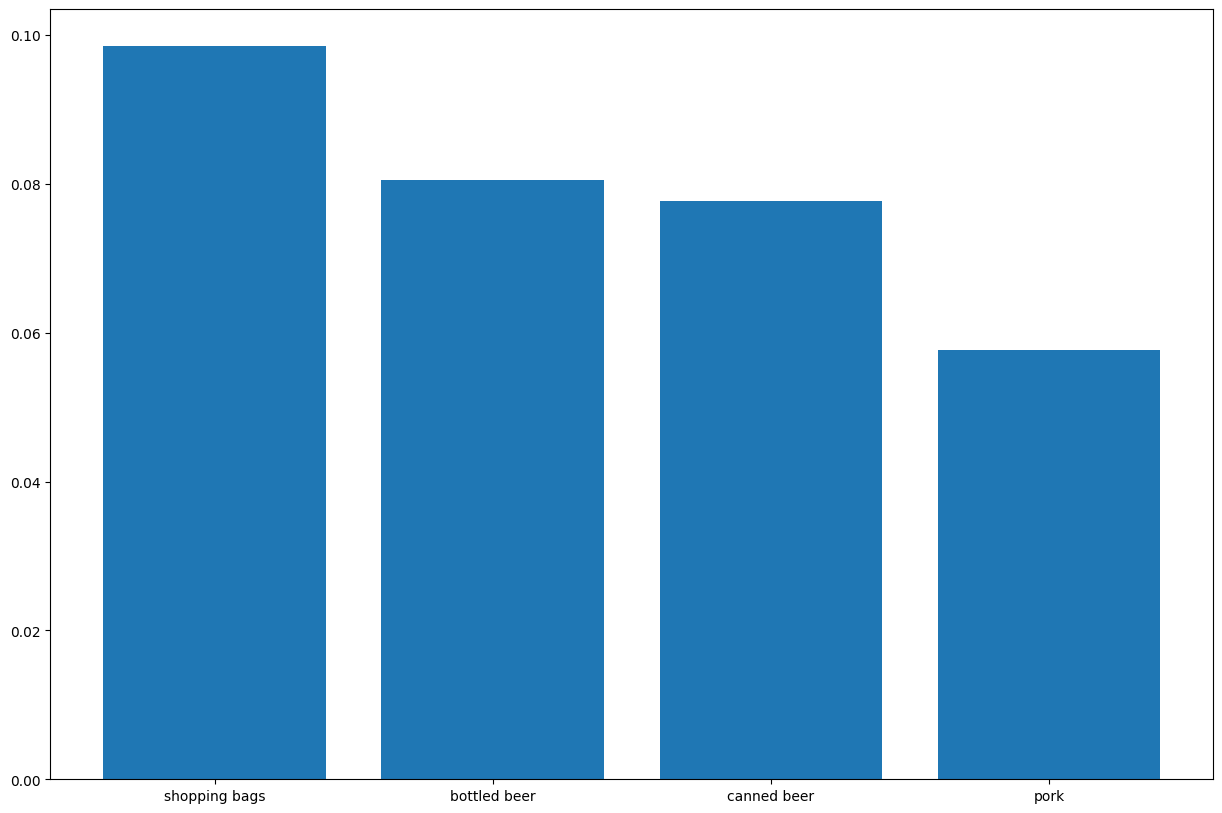

In [15]:
result2 = fpmax(data1, min_support=0.03, use_colnames=True, max_len=1)
itemsets = []
for i in result2["itemsets"]:
    itemsets.append(*list(i))
supports = []
for i in result2["support"]:
    supports.append(i)
dict2 = {}
for i in range(len(itemsets)):
    dict2[itemsets[i]] = supports[i]
gist2 = tuple(sorted(dict2.items(), key=lambda x: x[1], reverse=True))[0:10]
fig, ax = plt.subplots(figsize=(15, 10))
names = [name[0] for name in gist2]
sups = [sup[1] for sup in gist2]
ax.bar(names, sups)
plt.show()

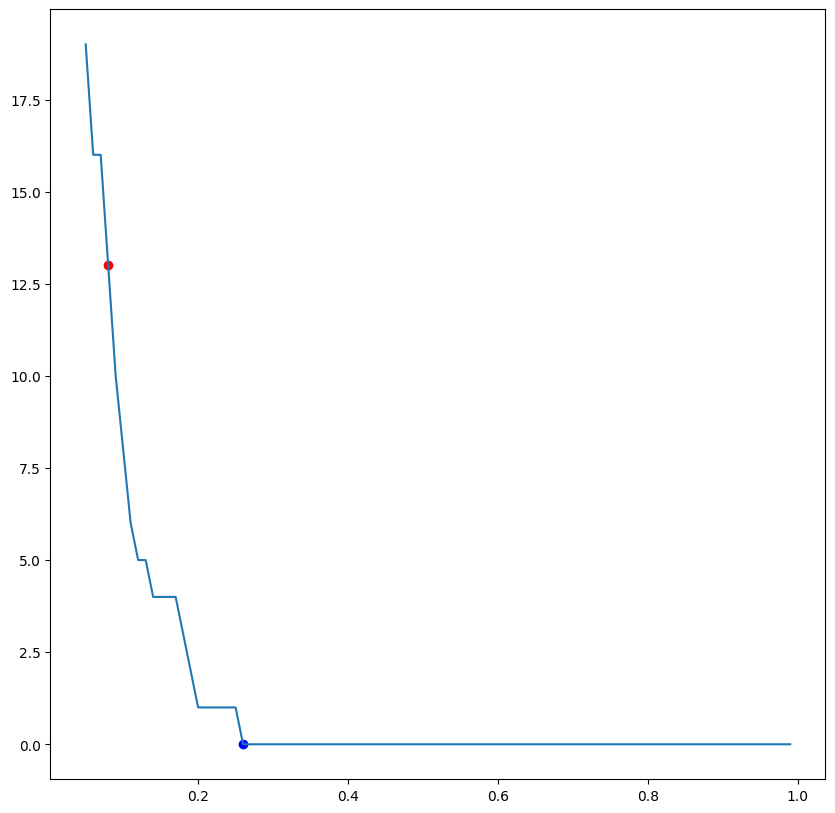

In [16]:
from decimal import Decimal
import matplotlib.pyplot as plt
i = Decimal(0.05)
support = []
length = []
ml = []
while i <= 1:
    support.append(i)
    results = fpgrowth(data1, min_support=i, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    length.append(len(results))
    if len(results) > 0:
        ml.append(max(results['length']))
    i += Decimal(0.01)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(support, length)
ax.scatter(support[ml.index(1)], length[ml.index(1)], color='red')
ax.scatter(support[len(ml)], length[len(ml)], color='blue')
plt.show()



In [17]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem, str) and elem in
            items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

In [18]:
result = fpgrowth(data, min_support=0.05, use_colnames = True)

In [19]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(result, min_threshold = 0.3)
print(rules)


          antecedents   consequents  antecedent support  consequent support  \
0            (yogurt)  (whole milk)            0.139502            0.255516   
1  (other vegetables)  (whole milk)            0.193493            0.255516   
2        (rolls/buns)  (whole milk)            0.183935            0.255516   

    support  confidence      lift  leverage  conviction  
0  0.056024    0.401603  1.571735  0.020379    1.244132  
1  0.074835    0.386758  1.513634  0.025394    1.214013  
2  0.056634    0.307905  1.205032  0.009636    1.075696  


In [20]:
print(" support определяется для наборов элементов. «antecedent support» вычисляет долю транзакций, «consequent suppor» вычисляет поддержку набора элементов.  Метрика lift обычно используется для измерения того, насколько чаще антецедент и консеквент правила  встречаются вместе. Leverage вычисляет разницу между наблюдаемой частотой появления .")

 support определяется для наборов элементов. «antecedent support» вычисляет долю транзакций, «consequent suppor» вычисляет поддержку набора элементов.  Метрика lift обычно используется для измерения того, насколько чаще антецедент и консеквент правила  встречаются вместе. Leverage вычисляет разницу между наблюдаемой частотой появления .


In [21]:
from statistics import mean, median
import numpy as np
result = fpgrowth(data, min_support=0.04, use_colnames=True)
rules = association_rules(result, min_threshold=0.1, metric='confidence')
print(rules)
print('Среднее значение параметра :'+ str(mean(rules["confidence"])))
print('Медиана параметра :'+ str(median(rules["confidence"])))
print('СКО параметра :' + str(np.std(rules["confidence"])))


           antecedents         consequents  antecedent support  \
0             (yogurt)        (whole milk)            0.139502   
1         (whole milk)            (yogurt)            0.255516   
2   (other vegetables)            (yogurt)            0.193493   
3             (yogurt)  (other vegetables)            0.139502   
4     (tropical fruit)        (whole milk)            0.104931   
5         (whole milk)    (tropical fruit)            0.255516   
6   (other vegetables)        (whole milk)            0.193493   
7         (whole milk)  (other vegetables)            0.255516   
8   (other vegetables)        (rolls/buns)            0.193493   
9         (rolls/buns)  (other vegetables)            0.183935   
10        (rolls/buns)        (whole milk)            0.183935   
11        (whole milk)        (rolls/buns)            0.255516   
12              (soda)        (whole milk)            0.174377   
13        (whole milk)              (soda)            0.255516   
14  (other

In [22]:
rules = association_rules(result, min_threshold=0.01, metric='support')
print(rules)
print('Среднее значение параметра :'+ str(mean(rules["support"])))
print('Медиана параметра :'+ str(median(rules["support"])))
print('СКО параметра :' + str(np.std(rules["support"])))

           antecedents         consequents  antecedent support  \
0             (yogurt)        (whole milk)            0.139502   
1         (whole milk)            (yogurt)            0.255516   
2   (other vegetables)            (yogurt)            0.193493   
3             (yogurt)  (other vegetables)            0.139502   
4     (tropical fruit)        (whole milk)            0.104931   
5         (whole milk)    (tropical fruit)            0.255516   
6   (other vegetables)        (whole milk)            0.193493   
7         (whole milk)  (other vegetables)            0.255516   
8   (other vegetables)        (rolls/buns)            0.193493   
9         (rolls/buns)  (other vegetables)            0.183935   
10        (rolls/buns)        (whole milk)            0.183935   
11        (whole milk)        (rolls/buns)            0.255516   
12              (soda)        (whole milk)            0.174377   
13        (whole milk)              (soda)            0.255516   
14  (other

In [23]:
rules = association_rules(result, min_threshold=0.01, metric='leverage')
print(rules)
print('Среднее значение параметра :'+ str(mean(rules["leverage"])))
print('Медиана параметра :'+ str(median(rules["leverage"])))
print('СКО параметра :' + str(np.std(rules["leverage"])))

           antecedents         consequents  antecedent support  \
0             (yogurt)        (whole milk)            0.139502   
1         (whole milk)            (yogurt)            0.255516   
2   (other vegetables)            (yogurt)            0.193493   
3             (yogurt)  (other vegetables)            0.139502   
4     (tropical fruit)        (whole milk)            0.104931   
5         (whole milk)    (tropical fruit)            0.255516   
6   (other vegetables)        (whole milk)            0.193493   
7         (whole milk)  (other vegetables)            0.255516   
8   (other vegetables)   (root vegetables)            0.193493   
9    (root vegetables)  (other vegetables)            0.108998   
10   (root vegetables)        (whole milk)            0.108998   
11        (whole milk)   (root vegetables)            0.255516   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.255516  0.056024    0.401603  1.571735  0.0203

In [24]:
rules = association_rules(result, min_threshold=0.01, metric='conviction')
print(rules)
print('Среднее значение параметра :'+ str(mean(rules["conviction"])))
print('Медиана параметра :'+ str(median(rules["conviction"])))
print('СКО параметра :' + str(np.std(rules["conviction"])))

           antecedents         consequents  antecedent support  \
0             (yogurt)        (whole milk)            0.139502   
1         (whole milk)            (yogurt)            0.255516   
2   (other vegetables)            (yogurt)            0.193493   
3             (yogurt)  (other vegetables)            0.139502   
4     (tropical fruit)        (whole milk)            0.104931   
5         (whole milk)    (tropical fruit)            0.255516   
6   (other vegetables)        (whole milk)            0.193493   
7         (whole milk)  (other vegetables)            0.255516   
8   (other vegetables)        (rolls/buns)            0.193493   
9         (rolls/buns)  (other vegetables)            0.183935   
10        (rolls/buns)        (whole milk)            0.183935   
11        (whole milk)        (rolls/buns)            0.255516   
12              (soda)        (whole milk)            0.174377   
13        (whole milk)              (soda)            0.255516   
14  (other

         antecedents         consequents  antecedent support  \
0           (yogurt)        (whole milk)            0.139502   
1   (tropical fruit)        (whole milk)            0.104931   
2  (root vegetables)  (other vegetables)            0.108998   
3  (root vegetables)        (whole milk)            0.108998   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.255516  0.056024    0.401603  1.571735  0.020379    1.244132  
1            0.255516  0.042298    0.403101  1.577595  0.015486    1.247252  
2            0.193493  0.047382    0.434701  2.246605  0.026291    1.426693  
3            0.255516  0.048907    0.448694  1.756031  0.021056    1.350401  


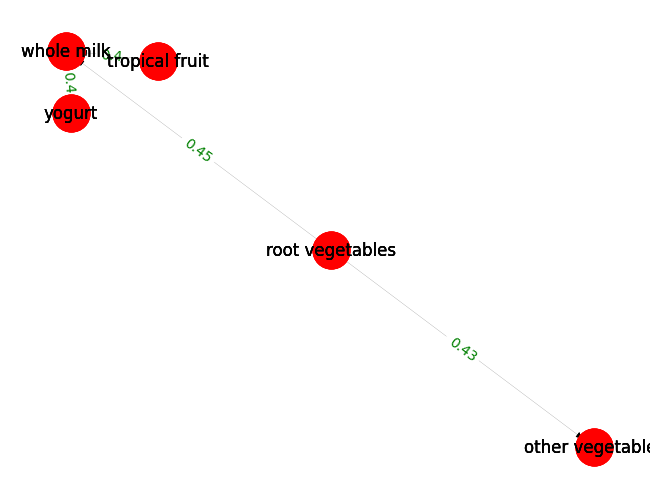

In [52]:
import networkx as nx
rules = association_rules(result, min_threshold=0.4, metric='confidence')
print(rules)
ant = rules["antecedents"]
edges = []
cons = rules["consequents"]
conf = rules["confidence"]
dict = {}
for i in range(len(ant)):
    edges.append([str(list(ant[i])[0]), str(list(cons[i])[0])])
    dict[(str(list(ant[i])[0]), str(list(cons[i])[0]))] = round(conf[i], 2)
sup = rules["support"]
edd = nx.DiGraph()
edd.add_edges_from(edges)
for i in range(len(ant)):
    edd.add_nodes_from([str(list(ant[i])[0]), str(list(cons[i])[0])])
plt.figure()
for i in range(len(dict.items())):
    nx.draw(edd, pos, edge_color='black', width=round(sup[i], 1), linewidths=5,node_size=500, node_color='red', alpha=0.9, font_size=12,labels={node: node for node in edd.nodes()})
nx.draw_networkx_edge_labels(edd, pos,edge_labels=dict,font_color='green')
plt.show()

In [48]:
print('На графе видно связи между антецедентами и консеквентами, а также уровень поддержки между ними.')

На графе видно связи между антецедентами и консеквентами, а также уровень поддержки между ними.
